## <font style='font-size: 30px;'> QUESTÃO 1 </font> <hr style='line: 2px solid;'>

- Represente a função de transferência na forma canônica controlável e na observável. 
- Calcule os autovalores da forma canônica controlável e da observável. 
- Teste a controlabilidade e observabilidade nas duas representações.
- Simule as duas representações a uma entrada em degrau unitário e confronte os estados de uma representação com a outra.

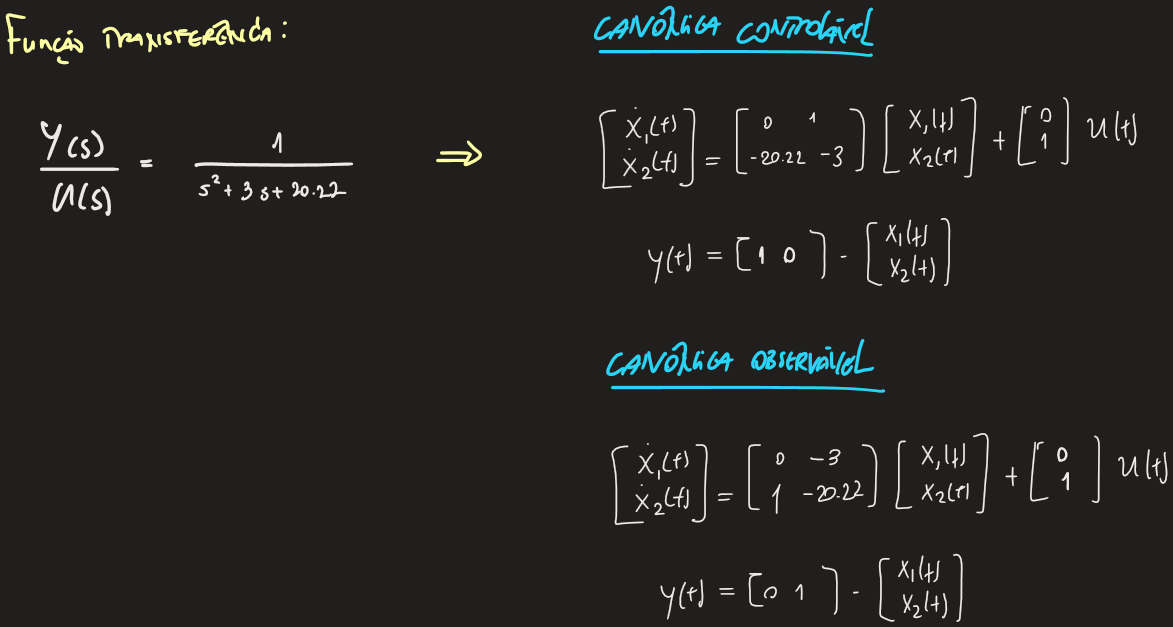

In [135]:
# Forma canônica controlável
A_controlavel = np.array([[0, 1], [-20.22, -3]])
B_controlavel = np.array([[0], [1]])
C_controlavel = np.array([[1, 0]])
D_controlavel = np.array([0])

# Forma canônica observável
A_observavel = np.array([[0, -3], [1, -20.22]])
B_observavel = np.array([[1], [0]])
C_observavel = np.array([0, 1])
D_observavel = np.array([0])

In [128]:
A_controlavel = np.array([[0, 1], [-20.22, -3]])
autovalores_controlavel = np.linalg.eigvals(A_controlavel)
print("Autovalores da forma canônica controlável:")
print(autovalores_controlavel)

Autovalores da forma canônica controlável:
[-1.5+4.23910368j -1.5-4.23910368j]


In [129]:
A_observavel = np.array([[0, -3], [1, -20.22]])
autovalores_observavel = np.linalg.eigvals(A_observavel)
print("Autovalores da forma canônica observável:")
print(autovalores_observavel)

Autovalores da forma canônica observável:
[ -0.14947291 -20.07052709]


> Controlabilidade

Para que o sistema $ \frac{1}{s^2 + 3s + 20.22}$ seja considerado de estado completamente controlável, QUALQUER combinação linear dos vetores A e B devem ser linearmente independentes e formarem uma base no espaço de controle do sistema. Porque isso? Porque isso garante que todas as informações necessárias para controlar completamente o sistema estão presentes nos vetores de controle. Se algo for linearmente DEPENDENTE, isso significa que precisamos de MAIS alguma variável para determinar o estado!

E como fazemos para descobrir? Basicamente, se o posto da matriz for da mesma ordem de combinações lineares (n), isso só pode indicar que nenhuma variável é linearmente dependente.

In [132]:
C_controlavel = np.concatenate((B_controlavel, np.dot(A_controlavel, B_controlavel)), axis=1)
O_observavel = np.concatenate((C_observavel, np.dot(C_observavel, A_observavel)), axis=0)

controlabilidade_controlavel = np.linalg.matrix_rank(C_controlavel) == A_controlavel.shape[0]
observabilidade_observavel = np.linalg.matrix_rank(O_observavel) == A_observavel.shape[0]

print("Controlabilidade na forma canônica controlável:", controlabilidade_controlavel)
print("Observabilidade na forma canônica observável:", observabilidade_observavel)

Controlabilidade na forma canônica controlável: True
Observabilidade na forma canônica observável: True


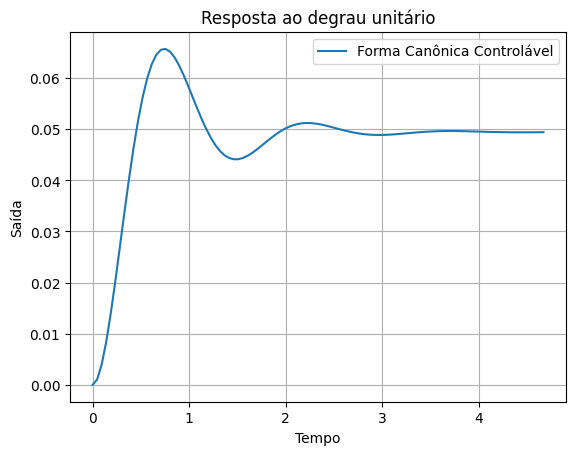

In [137]:
# Simulando resposta ao degrau unitário
sys_controlavel = signal.StateSpace(A_controlavel, B_controlavel, C_controlavel, D_controlavel)
t_controlavel, y_controlavel = signal.step(sys_controlavel)

# Plotando as saídas
plt.plot(t_controlavel, y_controlavel, label='Forma Canônica Controlável')
plt.xlabel('Tempo')
plt.ylabel('Saída')
plt.title('Resposta ao degrau unitário')
plt.legend()
plt.grid(True)
plt.show()

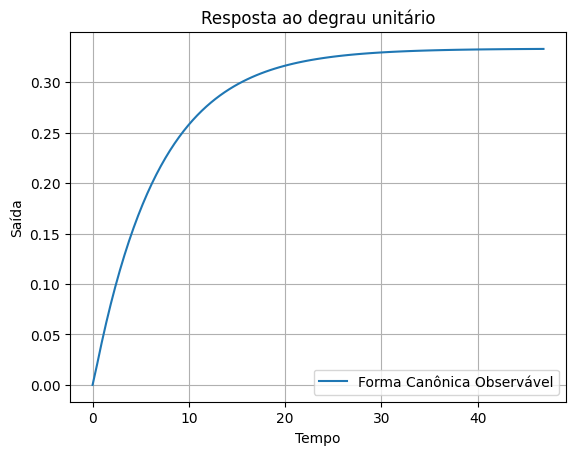

In [138]:
sys_observavel = signal.StateSpace(A_observavel, B_observavel, C_observavel, D_observavel)
t_observavel, y_observavel = signal.step(sys_observavel)

# Plotando as saídas
plt.plot(t_observavel, y_observavel, label='Forma Canônica Observável')
plt.xlabel('Tempo')
plt.ylabel('Saída')
plt.title('Resposta ao degrau unitário')
plt.legend()
plt.grid(True)
plt.show()

> Observabilidade

Novamente, precisamos que um determinado conjunto de vetores coluna sejam linearmente independentes. Isso garante que eles formam a base linear do sistema, permitindo estimar qualquer estado. Para verificar se eles são linearmente independentes, novamente, recorremos ao posto. Só que dessa vez não faremos mais uma relação das matrizes A e B, e sim das matrizes A e C. Porque?

Isso porque A → B relaciona as equações de estado interno do sistema. Já A → C, relaciona as equações de saída. Se o posto desses vetores colunas que irão compor a matriz dita de *observabilidade* forem n, isso só pode indicar que não houve redução e todos os vetores são linearmente independentes.

In [127]:
# Verificar observabilidade na forma canônica controlável
A_controlavel = np.array([[0, 1], [-20.22, -3]])
C_controlavel = np.array([[28.08, 0]])

observabilidade_controlavel = verificar_observabilidade(A_controlavel, C_controlavel)
print("Observabilidade na forma canônica controlável:", observabilidade_controlavel)

Observabilidade na forma canônica controlável: False


In [26]:
# Verificar observabilidade na forma canônica observável
A_observavel = np.array([[0, -3], [1, -20.22]])
C_observavel = np.array([[0, 1]])

observabilidade_observavel = verificar_observabilidade(A_observavel, C_observavel)
print("Observabilidade na forma canônica observável:", observabilidade_observavel)

Observabilidade na forma canônica observável: False


> Resposta ao degrau

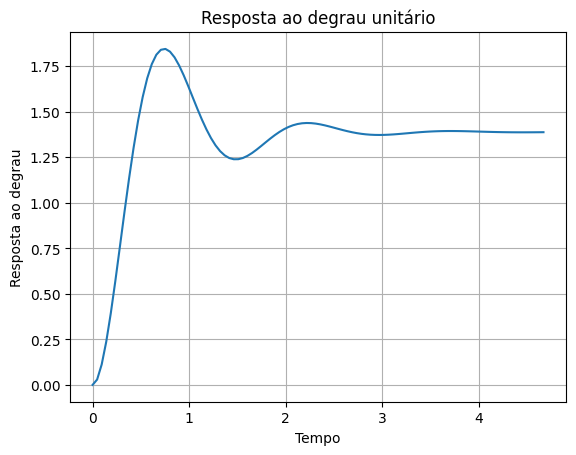

In [23]:
# Forma canônica controlável
A_controlavel = np.array([[0, 1], [-20.22, -3]])
B_controlavel = np.array([[0], [1]])
C_controlavel = np.array([28.08, 0])
D_controlavel = np.array([0])

# Simulação na forma canônica controlável
obter_degrau_ss(A_controlavel, B_controlavel, C_controlavel, D_controlavel)

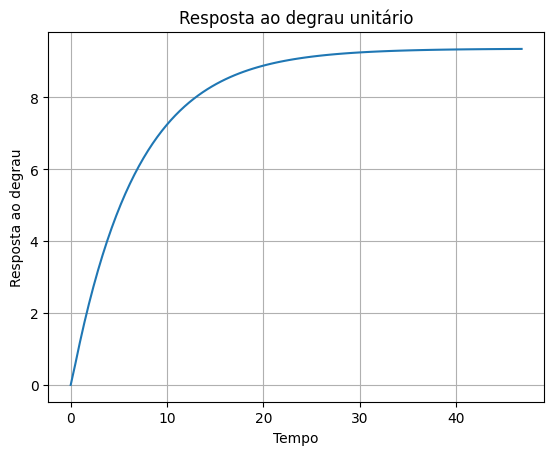

In [22]:
# Forma canônica observável
A_observavel = np.array([[0, -3], [1, -20.22]])
B_observavel = np.array([[28.08], [0]])
C_observavel = np.array([[0, 1]])
D_observavel = np.array([0])

# Simulação na forma canônica observável
obter_degrau_ss(A_observavel, B_observavel, C_observavel, D_observavel)

## <font style='font-size: 30px;'> QUESTÃO 2 </font> <hr style='line: 2px solid;'>

- Projete uma realimentação de estados. 
- Use a técnica de alocação de pólos adotando pólos dominantes complexos conjugados. 
- Verifique se o sistema realimentado possui os pólos desejados.

> Projeto de realimentação

Em resumo: Para projetar uma realimentação, é necessário encontrar uma matriz K que, quando multiplicada pela matriz de estado A, produza uma matriz (A - BK) com os polos desejados. Essa matriz K é encontrada através da técnica de alocação de polos, onde os polos desejados são especificados e a matriz K é calculada para atingir esses polos.

Fazer isso envolve 5 passos
    
1. Definir os pólos desejados
    
    *Usaremos (-4+3j) e (-4-3j), pois já sabemos de atividades anteriores que esses polos produzem nossos comportamentos desejados.*

2. Verificar a controlabilidade
    
    *Já verificamos acima!*

3. Projetar a matriz de realimentação

In [30]:
# Matrizes A e B do sistema original
A = np.array([[0, 1], [-20.22, -3]])
B = np.array([[0], [1]])

# Pólos desejados
p_desired = -4 + 3j

# Chamada da função para projetar a matriz de realimentação
K = projetar_realimentacao(A, B, p_desired)

Matriz de realimentação K:
[[4.78 5.  ]]


4. Verificar os pólos do sistema realimentado

In [31]:
polos = verificar_polos_realimentados(A, B, K)

Polos do sistema realimentado:
[-4.+3.j -4.-3.j]


5. Simular o sistema realimentado.

In [32]:
_ = obter_sistema_realimentado(A, B, K)

[[  0.   1.]
 [-25.  -8.]]


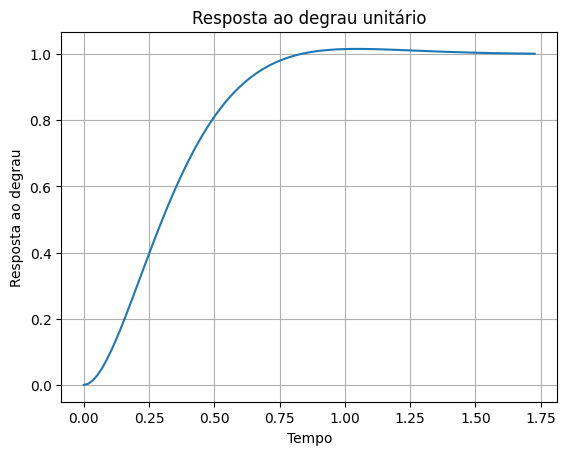

Informações do degrau:
Tempo de subida: 0.5059
Tempo de acomodação: 0.7675
Máximo overshoot: 1.5165
Erro em regime estacionário: 0.0000


In [33]:
# Forma canônica observável
A_realimentado = np.array([[0, 1], [-25, -8]])
B_realimentado = np.array([[-1], [0]])
C_realimentado = np.array([[0, 1]])
D_realimentado = np.array([0])

# Simulação na forma canônica observável
obter_degrau_ss2(A_realimentado, B_realimentado, C_realimentado, D_realimentado)

## <font style='font-size: 30px;'> QUESTÃO 3 </font> <hr style='line: 2px solid;'>

- Projete um servossistema tipo 1. 
- Use a técnica de alocação de pólos adotando pólos dominantes complexos conjugados. 
- Verifique se o sistema realimentado possui os pólos desejados. 
- Simule e verifique se a saída segue uma referência do tipo degrau unitário com o comportamento determinado pelos polos dominantes.
- Verifique se o sistema também compensa um distúrbio do tipo degrau unitário na entrada da planta.

> Projeto de servossistema tipo 1

Para projetar um servossistema, é necessário encontrar uma matriz Ki que, ao ser multiplicada pela matriz de estado A, produza uma matriz estendida A_servo com uma coluna adicional para a ação de controle integral. Essa ação integral permite que o sistema acompanhe e reduza o erro de estado estacionário. Abaixo, vou derivar de forma breve a explicação para a matriz que devemos produzir depois vou utilizar minhas 'funções sob medida'.

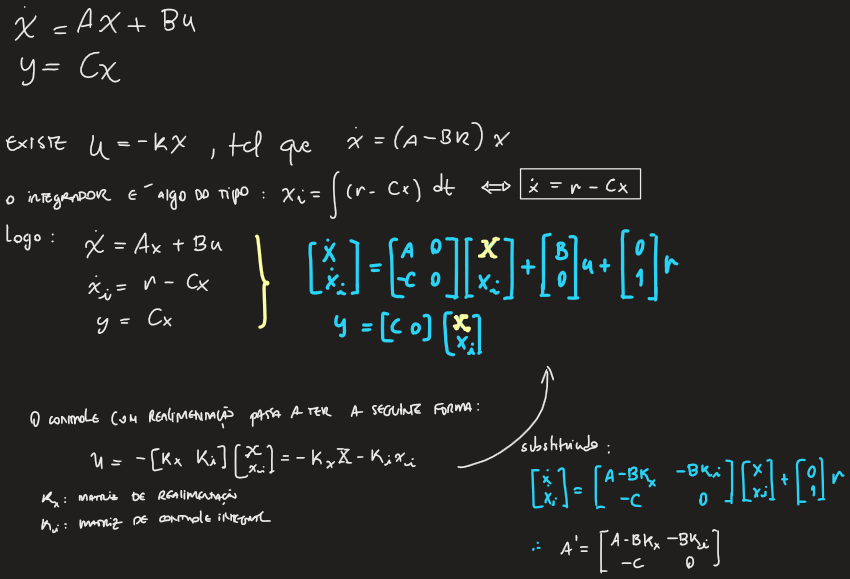

Polos do sistema em malha aberta: [-1.5+4.23910368j -1.5-4.23910368j]


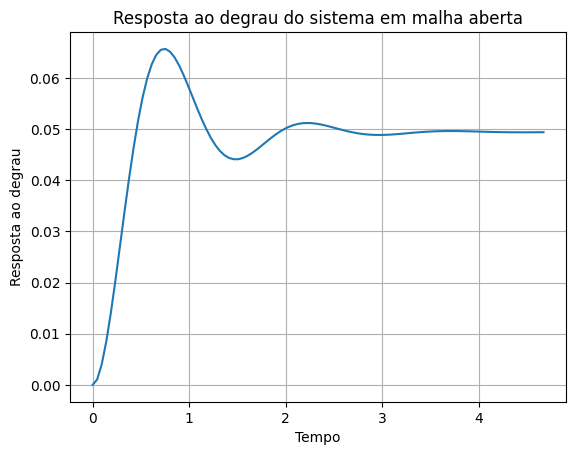

In [108]:
# Definir as matrizes do sistema
A = np.array([[0, 1], [-20.22, -3]])
B = np.array([[0], [1]])
C = np.array([1, 0])
D = np.array([0])

# Calcular os polos do sistema em malha aberta
polosMalhaAberta = np.linalg.eigvals(A)
print("Polos do sistema em malha aberta:", polosMalhaAberta)

# Criar o modelo de espaço de estados
sistemaMalhaAberta = signal.StateSpace(A, B, C, D)

# Simular a resposta ao degrau do sistema em malha aberta
t, y = signal.step(sistemaMalhaAberta)
plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Resposta ao degrau')
plt.title('Resposta ao degrau do sistema em malha aberta')
plt.grid(True)
plt.show()

A função abaixo implementa a matriz estendida de integração demonstrada acima. Além disso, os polos foram alocados seguindo o seguinte critério:

- Afastamos os polos complexos em 3 vezes em relação a origem;
- Posicionamos o polo integrador 10 vezes mais distante, para garantir que não irá interferir com os dominantes

Com isso, diminuimos o tempo de acomodação em 2 segundos e garantimos o erro 0

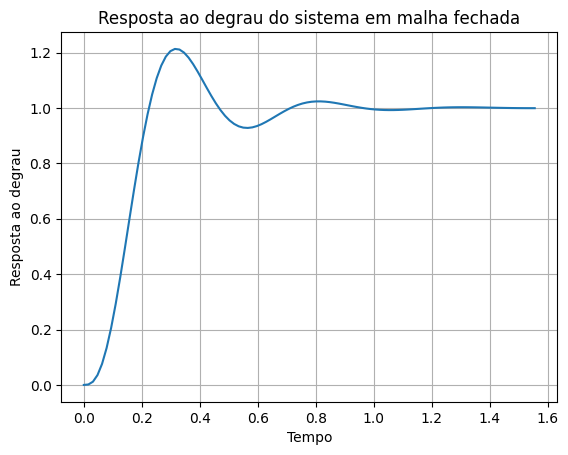

In [123]:
# Definir o sistema aumentado para a alocação de polos
At = np.block([[A, np.zeros((A.shape[0], 1))], [-C, 0]])
Bt = np.vstack((B, 0))
Br = np.block([[np.zeros((A.shape[0], 1))], [1]])

# Calcular os polos do sistema em malha aberta
polosMalhaAberta = np.linalg.eigvals(A)

# Definir os polos desejados para o sistema em malha fechada
polosFechadaDesejados = np.block([3 * polosMalhaAberta, 10 * np.min(polosMalhaAberta[0].real)])

# Calcular o ganho de controle K utilizando a função place
K = signal.place_poles(At, Bt, polosFechadaDesejados).gain_matrix

# Calcular a matriz de estado do sistema em malha fechada
Acl = At - np.dot(Bt, K)

# Definir a matriz C em malha fechada
Ccl = np.block([C, 0])
Dcl = np.array([0])

# Criar o modelo de espaço de estados do sistema em malha fechada
sistemaMalhaFechada = signal.StateSpace(Acl, Br, Ccl, Dcl)

# Simular a resposta ao degrau do sistema em malha fechada
t, y = signal.step(sistemaMalhaFechada)

# Plotar a resposta ao degrau do sistema em malha fechada
plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Resposta ao degrau')
plt.title('Resposta ao degrau do sistema em malha fechada')
plt.grid(True)
plt.show()


## <font style='font-size: 30px;'> QUESTÃO 4 </font> <hr style='line: 2px solid;'>

- Projete um observador de estados para a planta. 
- Use a técnica de alocação de pólos adotando pólos dominantes complexos conjugados, mais rápidos que os adotados para a realimentação. 
- Verifique se o observador possui os pólos desejados. 
- Simule o observador e confronte os estados estimados pelo observador com os da planta, nas condições nulas e não nulas quando submetidos a uma entrada do tipo degrau unitário.

> Projeto de observador

Para projetar um observador, é necessário encontrar uma matriz de ganho do observador L que, ao ser multiplicada pela matriz de estado A, produza uma matriz (A - LC) com os polos desejados. Essa matriz L é encontrada através da técnica de alocação de polos, onde os polos desejados para o observador são especificados e a matriz L é calculada para atingir esses polos.

É semelhante a realimentação, mas aqui a técnica envolve a estimação do estado não mensurável de um sistema com base nas medições disponíveis.

Polos do observador: [-2.+4.49666543j -2.-4.49666543j]


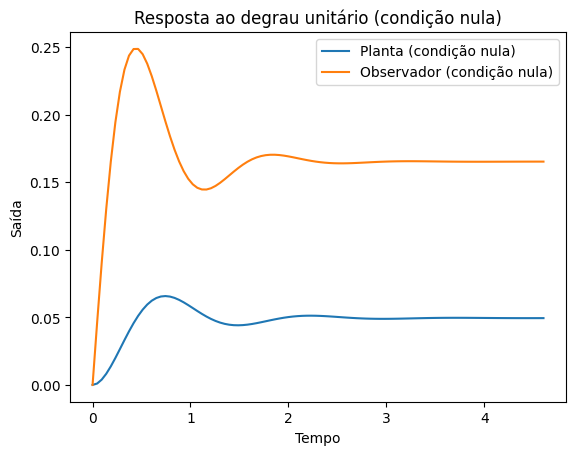

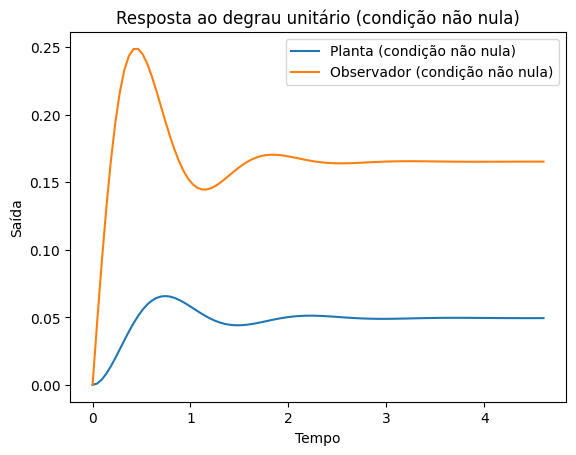

In [124]:
# Modelo da planta
A = np.array([[0, 1], [-20.22, -3]])
B = np.array([[0], [1]])
C = np.array([[1, 0]])
D = np.array([[0]])

# Polos desejados para o observador
p = np.array([-4 + 3j])

# Calculando a matriz de ganho do observador
L = control.acker(A.T, C.T, p).T

# Verificando os polos do observador
observer_poles = np.linalg.eigvals(A - L @ C)
print("Polos do observador:", observer_poles)

# Simulação
sys_plant = control.ss(A, B, C, D)
sys_observer = control.ss(A - L @ C, L, C, D)

# Condição nula: degrau unitário na entrada
t, y_plant = control.step_response(sys_plant)
t, y_observer = control.step_response(sys_observer, T=t)

# Condição não nula: degrau unitário na entrada
t, y_plant_nonzero = control.step_response(sys_plant, T=t, X0=[0, 0])
t, y_observer_nonzero = control.step_response(sys_observer, T=t, X0=[0, 0])

# Plot dos resultados
plt.figure()
plt.plot(t, y_plant, label='Planta (condição nula)')
plt.plot(t, y_observer, label='Observador (condição nula)')
plt.xlabel('Tempo')
plt.ylabel('Saída')
plt.title('Resposta ao degrau unitário (condição nula)')
plt.legend()

plt.figure()
plt.plot(t, y_plant_nonzero, label='Planta (condição não nula)')
plt.plot(t, y_observer_nonzero, label='Observador (condição não nula)')
plt.xlabel('Tempo')
plt.ylabel('Saída')
plt.title('Resposta ao degrau unitário (condição não nula)')
plt.legend()

plt.show()

## <font style='font-size: 30px;'> QUESTÃO 5 </font> <hr style='line: 2px solid;'>

- Adicione o observador projetado no item 4 ao servossistema projetado no item 3. 
- Simule e verifique se a saída segue uma referência do tipo degrau unitário com o comportamento determinado pelos polos dominantes.

> Unificando tudo

Adicionamos o observador e o integrador ao sistema de controle para deixar ele mais esperto! Assim, conseguimos ter uma resposta mais certa e rápida quando a referência muda. O observador dá uma estimativa do que está acontecendo dentro do sistema, enquanto o integrador ajuda a corrigir qualquer erro persistente entre a referência e o que o sistema responde. 

Polos do observador: [-2.+4.49666543j -2.-4.49666543j]


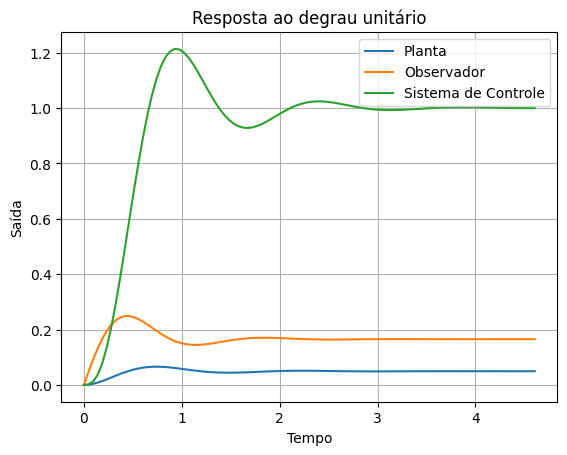

In [125]:
# Código do item 3 (Servossistema projetado)
# Definir o sistema aumentado para a alocação de polos
At = np.block([[A, np.zeros((A.shape[0], 1))], [-C, 0]])
Bt = np.vstack((B, 0))
Br = np.block([[np.zeros((A.shape[0], 1))], [1]])

# Calcular os polos do sistema em malha aberta
polosMalhaAberta = np.linalg.eigvals(A)

# Definir os polos desejados para o sistema em malha fechada
polosFechadaDesejados = np.block([3 * polosMalhaAberta, 10 * np.min(polosMalhaAberta[0].real)])

# Calcular o ganho de controle K utilizando a função place
K = signal.place_poles(At, Bt, polosFechadaDesejados).gain_matrix

# Calcular a matriz de estado do sistema em malha fechada
Acl = At - np.dot(Bt, K)

# Definir a matriz C em malha fechada
Ccl = np.block([C, 0])
Dcl = np.array([0])

# Criar o modelo de espaço de estados do sistema em malha fechada
sistemaMalhaFechada = signal.StateSpace(Acl, Br, Ccl, Dcl)

# Simular a resposta ao degrau do sistema em malha fechada
t, y_servo = signal.step(sistemaMalhaFechada)


# Código do item 4 (Observador projetado)
# Modelo da planta
A_planta = np.array([[0, 1], [-20.22, -3]])
B_planta = np.array([[0], [1]])
C_planta = np.array([[1, 0]])
D_planta = np.array([[0]])

# Polos desejados para o observador
p = np.array([-4 + 3j])

# Calculando a matriz de ganho do observador
L = control.acker(A_planta.T, C_planta.T, p).T

# Verificando os polos do observador
observer_poles = np.linalg.eigvals(A_planta - L @ C_planta)
print("Polos do observador:", observer_poles)

# Simulação do observador
sys_planta = control.ss(A_planta, B_planta, C_planta, D_planta)
sys_observer = control.ss(A_planta - L @ C_planta, L, C_planta, D_planta)

# Simulação do observador na referência degrau unitário
t, y_planta = control.step_response(sys_planta)
t, y_observer = control.step_response(sys_observer, T=t)

# Plot dos resultados
plt.figure()
plt.plot(t, y_planta, label='Planta')
plt.plot(t, y_observer, label='Observador')
plt.plot(t, y_servo, label='Sistema de Controle')
plt.xlabel('Tempo')
plt.ylabel('Saída')
plt.title('Resposta ao degrau unitário')
plt.legend()
plt.grid(True)
plt.show()

# Funções feitas sob medida

In [109]:
import numpy as np
import control as ct
from scipy import signal
import matplotlib.pyplot as plt


# Manipuladores

def obter_degrau_ss(A, B, C, D):
    
    # Simulação da resposta ao degrau
    t, y = signal.step((A, B, C, D))
    plt.plot(t, y)

    plt.xlabel('Tempo')
    plt.ylabel('Resposta ao degrau')
    plt.title('Resposta ao degrau unitário')
    plt.grid(True)
    plt.show()

def obter_degrau_ss2(A, B, C, D):
    sys = ct.ss(A, B, C, D)
    t, y = ct.step_response(sys)
    info = ct.step_info(sys)
    
    plt.plot(t, y)
    plt.xlabel('Tempo')
    plt.ylabel('Resposta ao degrau')
    plt.title('Resposta ao degrau unitário')
    plt.grid(True)
    plt.show()
    
    print("Informações do degrau:")
    print(f"Tempo de subida: {info['RiseTime']:.4f}")
    print(f"Tempo de acomodação: {info['SettlingTime']:.4f}")
    print(f"Máximo overshoot: {info['Overshoot']:.4f}")
    error = 1.0 - info['SteadyStateValue']
    print(f"Erro em regime estacionário: {error:.4f}")


# Questão 1


def obter_espaco_estados(num, den):
    sys = ct.tf2ss(num, den)  # Converter para a forma de espaço de estados
    
    print("Matriz A:")
    print(sys.A)
    
    print("\nMatriz B:")
    print(sys.B)
    
    print("\nMatriz C:")
    print(sys.C)
    
    print("\nMatriz D:")
    print(sys.D)
    
    return sys.A, sys.B, sys.C, sys.D

def obter_forma_canonica_controlavel(num, den):
    # Calcula o grau do polinômio do denominador
    grau = len(den) - 1

    # Cria a matriz A_cont
    A_cont = []
    for i in range(1, grau + 1):
        linha = [0] * (grau - 1) + [-den[i] / den[0]] + [0] * (i - 1)
        A_cont.append(linha)

    # Cria a matriz B_cont
    B_cont = [[1] + [0] * (grau - 1)]

    # Cria a matriz C_cont
    C_cont = [[0] * (grau - 1) + [num[0] / den[0]]]

    # Define a matriz D_cont
    D_cont = [[0]]

    # Imprime as matrizes
    print("Matriz A_cont:")
    for linha in A_cont:
        print(linha)
    print("Matriz B_cont:")
    for linha in B_cont:
        print(linha)
    print("Matriz C_cont:")
    for linha in C_cont:
        print(linha)
    print("Matriz D_cont:")
    for linha in D_cont:
        print(linha)

    return A_cont, B_cont, C_cont, D_cont

def encontrar_autovalores(A):
    autovalores = np.linalg.eigvals(A)
    print("Autovalores:")
    print(autovalores)

def verificar_controlabilidade(A, B):
    n = A.shape[0]  # Dimensão do sistema
    controlabilidade_matrix = np.column_stack([B] + [np.dot(np.linalg.matrix_power(A, i), B) for i in range(1, n)])
    posto = np.linalg.matrix_rank(controlabilidade_matrix)

    return posto == n

def verificar_observabilidade(A, C):
    n = A.shape[0]  # Dimensão do sistema
    observabilidade_matrix = np.column_stack([C] + [np.dot(C, np.linalg.matrix_power(A, i)) for i in range(1, n)])
    posto = np.linalg.matrix_rank(observabilidade_matrix)

    return posto == n


# Questão 2

def projetar_realimentacao(A, B, p_desired):
    
    # Verificar a controlabilidade
    controlavel = verificar_controlabilidade(A, B)
    if not controlavel:
        print("O sistema não é controlável.")
        return None

    # Calcular a matriz de realimentação
    p_conjugate = np.conjugate(p_desired)
    p_array = np.array([p_desired, p_conjugate], dtype=np.complex128)
    K = signal.place_poles(A, B, p_array).gain_matrix
    print("Matriz de realimentação K:")
    print(K)

    return K

def verificar_polos_realimentados(A, B, K):

    Poles = None

    if K is not None:
        # Calcular os polos do sistema realimentado
        poles = np.linalg.eigvals(A - np.dot(B, K))

    print("Polos do sistema realimentado:")
    print(poles)

    return poles

def obter_sistema_realimentado(A, B, K):
    # Retorna o sistema realimentado A - BK
    R = A - np.dot(B, K)
    print(R)
    return R


# Questão 3

def estender_planta(A, B, C, D):
    
    n = A.shape[0]  # Obtém o número de variáveis de estado da planta original
    m = B.shape[1]  # Obtém o número de entradas da planta original
    
    # Cria uma matriz extendida A com o integrador adicionado
    A_ext = np.block([[A, np.zeros((n, 1))],
                      [np.zeros((1, n)), np.zeros((1, 1))]])
    
    # Cria uma matriz extendida B com uma coluna adicional para o integrador
    B_ext = np.block([[B],
                      [np.zeros((1, m))]])
    
    # Cria uma matriz extendida C adicionando uma linha para a saída do integrador
    C_ext = np.block([[C, np.zeros((1, 1))]])
    
    # Cria uma matriz extendida D adicionando uma linha para a saída do integrador
    D_ext = np.block([[D]])
    
    return A_ext, B_ext, C_ext, D_ext

def projetar_integrador(A, B, C, D):
    
    # Definir o sistema aumentado para a alocação de polos
    At = np.block([[A, np.zeros((A.shape[0], 1))], [-C, 0]])
    Bt = np.vstack((B, 0))
    Br = np.block([[np.zeros((A.shape[0], 1))], [1]])

    # Calcular os polos do sistema em malha aberta
    polosMalhaAberta = np.linalg.eigvals(A)

    # Definir os polos desejados para o sistema em malha fechada
    polosFechadaDesejados = np.block([3 * polosMalhaAberta, 10 * np.min(polosMalhaAberta[0].real)])

    # Calcular o ganho de controle K utilizando a função place
    K = signal.place_poles(At, Bt, polosFechadaDesejados).gain_matrix

    # Calcular a matriz de estado do sistema em malha fechada
    Acl = At - np.dot(Bt, K)

    # Definir a matriz C em malha fechada
    Ccl = np.block([C, 0])
    Dcl = np.array([0])

    # Criar o modelo de espaço de estados do sistema em malha fechada
    sistemaMalhaFechada = signal.StateSpace(Acl, Br, Ccl, Dcl)

    # Simular a resposta ao degrau do sistema em malha fechada
    t, y = signal.step(sistemaMalhaFechada)

    # Plotar a resposta ao degrau do sistema em malha fechada
    plt.plot(t, y)
    plt.xlabel('Tempo')
    plt.ylabel('Resposta ao degrau')
    plt.title('Resposta ao degrau do sistema em malha fechada')
    plt.grid(True)
    plt.show()

    # Retornar os polos alocados
    return np.linalg.eigvals(Acl)

# Questão 4 

def projetar_observador_estados(A, C, p_desired):
    # Implemente aqui o seu código para projetar o observador de estados
    # Retorna a matriz de ganho do observador L
    pass

def simular_observador_estados(A, C, L, x0_planta, x0_observador, t_final):
    
    sys_planta = signal.StateSpace(A, np.zeros((A.shape[0], 1)), C, np.zeros((1, 1)))
    sys_observador = signal.StateSpace(A - np.dot(L, C), np.dot(L, np.ones((1, A.shape[0]))), np.eye(A.shape[0]), np.zeros((A.shape[0], 1)))

    t, y_planta, x_planta = signal.step(sys_planta, X0=x0_planta, T=np.linspace(0, t_final, 500))
    t, y_observador, x_observador = signal.step(sys_observador, X0=x0_observador, T=np.linspace(0, t_final, 500))

    plt.figure()
    plt.plot(t, np.squeeze(y_planta), label='Saída Planta')
    plt.plot(t, np.squeeze(y_observador), label='Saída Observador')
    plt.xlabel('Tempo')
    plt.ylabel('Saída')
    plt.title('Saída da Planta vs Observador de Estados')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    for i in range(A.shape[0]):
        plt.plot(t, x_planta[:, i], label=f'Estado {i+1} Planta')
        plt.plot(t, x_observador[:, i], label=f'Estado {i+1} Observador')
    plt.xlabel('Tempo')
    plt.ylabel('Estado')
    plt.title('Estados da Planta vs Observador de Estados')
    plt.legend()
    plt.grid(True)
    plt.show()



